In [1]:
# 讀取檔案並秀出
from OCC.Display.SimpleGui import init_display
from OCC.Extend.DataExchange import read_iges_file

shapes = read_iges_file(r"C:\NTHU\IRTI-Project\complex_1.IGS")
# 初始化 3D 顯示環境
display, start_display, add_menu, add_function_to_menu = init_display()
display.DisplayShape(shapes, update=True)
start_display()

1. 將物件中所有的面都畫出來

In [2]:
import os
from OCC.Display.SimpleGui import init_display
from OCC.Core.IGESControl import IGESControl_Reader
from OCC.Core.TopExp import TopExp_Explorer
from OCC.Core.TopoDS import topods
from OCC.Core.TopAbs import TopAbs_FACE
from OCC.Extend.DataExchange import read_iges_file

# 初始化可视化环境，如果支持离屏渲染请启用
display, start_display, add_menu, add_function_to_menu = init_display()
display.SetModeShaded()
display.DisableAntiAliasing()

# IGS文件路径
file_path = r"C:\NTHU\IRTI-Project\complex_1.IGS"

# 图像的保存路径
image_directory = r"C:\NTHU\IRTI-Project\Images"
if not os.path.exists(image_directory):
    os.makedirs(image_directory)

# # 读取IGES文件
# reader = IGESControl_Reader()
# status = reader.ReadFile(file_path)
shape =read_iges_file(file_path)

if 1:  # 成功读取文件
    
    index = 1
    explorer = TopExp_Explorer(shape, TopAbs_FACE)
    while explorer.More():
        face = topods.Face(explorer.Current())
        
        # 清除当前显示，并准备显示新的面
        display.EraseAll()
        
        # 显示当前面，但不更新视图
        display.DisplayShape(face, update=False, color='BLUE', transparency=0.5)
        
        # 确保视图被更新（离屏渲染）
        display.View.Update()
        display.FitAll()
        
        # 保存每个面的图像
        image_path = os.path.join(image_directory, f'face_{index}.png')
        display.View.Dump(image_path)
        print(f'Saved image of face {index} to {image_path}')

        # 移动到下一个面
        index += 1
        explorer.Next()
        
        # 确保更新视图以处理下一次迭代（如果在循环中有视图更新）
        display.View.Update()

else:
    print("Failed to read the file.")

Many colors for color name BLUE, using first.
Saved image of face 1 to C:\NTHU\IRTI-Project\Images\face_1.png
Many colors for color name BLUE, using first.
Saved image of face 2 to C:\NTHU\IRTI-Project\Images\face_2.png
Many colors for color name BLUE, using first.
Saved image of face 3 to C:\NTHU\IRTI-Project\Images\face_3.png
Many colors for color name BLUE, using first.
Saved image of face 4 to C:\NTHU\IRTI-Project\Images\face_4.png
Many colors for color name BLUE, using first.
Saved image of face 5 to C:\NTHU\IRTI-Project\Images\face_5.png
Many colors for color name BLUE, using first.
Saved image of face 6 to C:\NTHU\IRTI-Project\Images\face_6.png
Many colors for color name BLUE, using first.
Saved image of face 7 to C:\NTHU\IRTI-Project\Images\face_7.png
Many colors for color name BLUE, using first.
Saved image of face 8 to C:\NTHU\IRTI-Project\Images\face_8.png
Many colors for color name BLUE, using first.
Saved image of face 9 to C:\NTHU\IRTI-Project\Images\face_9.png
Many color

2. 去計算每個面的一些資訊(面積，上下界，面的類型) 有問題，需更改讀黨方式

In [3]:
import os
import time
from OCC.Display.SimpleGui import init_display
from OCC.Core.IGESControl import IGESControl_Reader
from OCC.Core.TopExp import TopExp_Explorer
from OCC.Core.TopoDS import topods_Face
from OCC.Core.TopAbs import TopAbs_FACE
from OCC.Core.BRepTools import breptools_UVBounds
from OCC.Core.GeomLProp import GeomLProp_SLProps
from OCC.Core.BRepGProp import brepgprop_SurfaceProperties
from OCC.Core.BRepAdaptor import BRepAdaptor_Surface
from OCC.Core.GProp import GProp_GProps
from OCC.Core.gp import gp_Pnt

file_path = r"C:\NTHU\IRTI-Project\my_box.igs"

reader = IGESControl_Reader()
status = reader.ReadFile(file_path)
if status == 1: 
    reader.TransferRoots()
    shape = reader.Shape()

    index = 1
    explorer = TopExp_Explorer(shape, TopAbs_FACE)
    while explorer.More():
        face = topods_Face(explorer.Current())
        
        adaptor_surface = BRepAdaptor_Surface(face, True)
        surface_type = adaptor_surface.GetType()              # 獲取面的類型
    
        # 獲取面的邊界
        u_min, u_max, v_min, v_max = adaptor_surface.FirstUParameter(), adaptor_surface.LastUParameter(), adaptor_surface.FirstVParameter(), adaptor_surface.LastVParameter()
    
        # 計算面積
        gprops = GProp_GProps()                             # 用於獲取面的質量等信息
        brepgprop_SurfaceProperties(face, gprops)           # 計算面的面積
        area = gprops.Mass()                                # 獲取面的面積

        print(f"Face {index}:")
        print(f"  Type: {surface_type}")
        print(f"  Bounds in U: {u_min} to {u_max}")
        print(f"  Bounds in V: {v_min} to {v_max}")
        print(f"  Area: {area}")

        index += 1
        explorer.Next()

3. 獲取每個面的邊線

In [4]:
import os
from OCC.Core.TopExp import TopExp_Explorer
from OCC.Core.TopoDS import topods_Face, topods_Edge
from OCC.Core.TopAbs import TopAbs_FACE, TopAbs_EDGE
from OCC.Core.BRepAdaptor import BRepAdaptor_Curve
from OCC.Core.GProp import GProp_GProps
from OCC.Core.BRepGProp import brepgprop_LinearProperties
from OCC.Extend.DataExchange import read_iges_file

file_path = r"C:\NTHU\IRTI-Project\complex_1.IGS"

shape =read_iges_file(file_path)

if 1:
    index = 1
    face_explorer = TopExp_Explorer(shape, TopAbs_FACE)
    while face_explorer.More():
        face = topods_Face(face_explorer.Current())
        print(f"Face {index}:")

        edge_explorer = TopExp_Explorer(face, TopAbs_EDGE)
        edge_index = 1
        while edge_explorer.More():
            edge = topods_Edge(edge_explorer.Current())
            
            gprops_edge = GProp_GProps()
            brepgprop_LinearProperties(edge, gprops_edge)
            length = gprops_edge.Mass()  # 邊線長度
            
            curve_adaptor = BRepAdaptor_Curve(edge)
            curve_type = curve_adaptor.GetType()

            print(f"  Edge {edge_index}: Length = {length}, Type = {curve_type}")
            
            edge_index += 1
            edge_explorer.Next()

        index += 1
        face_explorer.Next()
else:
    print("Failed to read the file.")

Face 1:
  Edge 1: Length = 7.0, Type = 0
  Edge 2: Length = 7.0, Type = 0
  Edge 3: Length = 6.999999999999999, Type = 6
  Edge 4: Length = 6.999999999999999, Type = 6
Face 2:
  Edge 1: Length = 7.0, Type = 0
  Edge 2: Length = 0.6268088237777452, Type = 6
  Edge 3: Length = 0.6231271677424185, Type = 6
  Edge 4: Length = 1.2523433620615796, Type = 6
  Edge 5: Length = 1.250251215575999, Type = 6
  Edge 6: Length = 0.6225830927390587, Type = 6
  Edge 7: Length = 0.6229311662923225, Type = 6
  Edge 8: Length = 4.0, Type = 0
  Edge 9: Length = 0.6268088237777449, Type = 6
  Edge 10: Length = 0.6231271677424192, Type = 6
  Edge 11: Length = 1.2523433620615785, Type = 6
  Edge 12: Length = 1.250251215575999, Type = 6
  Edge 13: Length = 0.6225830927390581, Type = 6
  Edge 14: Length = 0.6229311662923229, Type = 6
  Edge 15: Length = 4.0, Type = 0
  Edge 16: Length = 0.6268088237777463, Type = 6
  Edge 17: Length = 0.6231271677424173, Type = 6
  Edge 18: Length = 1.2523433620615805, Type = 

C:\Users\nick2\AppData\Local\Temp\ipykernel_2404\4197174900.py:18: DeprecationWarning: Call to deprecated function topods_Face since pythonocc-core 7.7.1. This function will be removed in a future release, please rather use the static method topods.Face
  face = topods_Face(face_explorer.Current())
C:\Users\nick2\AppData\Local\Temp\ipykernel_2404\4197174900.py:24: DeprecationWarning: Call to deprecated function topods_Edge since pythonocc-core 7.7.1. This function will be removed in a future release, please rather use the static method topods.Edge
  edge = topods_Edge(edge_explorer.Current())
C:\Users\nick2\AppData\Local\Temp\ipykernel_2404\4197174900.py:27: DeprecationWarning: Call to deprecated function brepgprop_LinearProperties since pythonocc-core 7.7.1. This function will be removed in a future release, please rather use the static method brepgprop.LinearProperties
  brepgprop_LinearProperties(edge, gprops_edge)
C:\Users\nick2\AppData\Local\Temp\ipykernel_2404\4197174900.py:24: D

In [5]:
import os
from OCC.Display.SimpleGui import init_display
from OCC.Core.TopExp import TopExp_Explorer
from OCC.Core.TopoDS import topods_Face, topods_Edge
from OCC.Core.TopAbs import TopAbs_FACE, TopAbs_EDGE
from OCC.Core.GProp import GProp_GProps
from OCC.Core.BRepGProp import brepgprop_LinearProperties
from OCC.Extend.DataExchange import read_iges_file


# 初始化可视化环境
display, start_display, add_menu, add_function_to_menu = init_display()

# IGS文件路径
file_path = r"C:\NTHU\IRTI-Project\complex_1.IGS"

shape =read_iges_file(file_path)
if 1:
    index = 1
    face_explorer = TopExp_Explorer(shape, TopAbs_FACE)
    while face_explorer.More():
        face = topods_Face(face_explorer.Current())
        # 显示当前面
        display.DisplayShape(face, update=True, color='BLUE')

        print(f"Face {index}:")

        edge_explorer = TopExp_Explorer(face, TopAbs_EDGE)
        edge_index = 1
        while edge_explorer.More():
            edge = topods_Edge(edge_explorer.Current())

            # 获取边的长度
            gprops_edge = GProp_GProps()
            brepgprop_LinearProperties(edge, gprops_edge)
            length = gprops_edge.Mass()  # 边的长度

            # 显示边缘
            display.DisplayShape(edge, update=True, color='RED')

            # 输出边信息
            print(f"  Edge {edge_index}: Length = {length}")

            edge_index += 1
            edge_explorer.Next()

        index += 1
        face_explorer.Next()
    
    # 刷新显示
    display.FitAll()
    start_display()
else:
    print("Failed to read the file.")

C:\Users\nick2\AppData\Local\Temp\ipykernel_2404\2218378815.py:22: DeprecationWarning: Call to deprecated function topods_Face since pythonocc-core 7.7.1. This function will be removed in a future release, please rather use the static method topods.Face
  face = topods_Face(face_explorer.Current())
C:\Users\nick2\AppData\Local\Temp\ipykernel_2404\2218378815.py:31: DeprecationWarning: Call to deprecated function topods_Edge since pythonocc-core 7.7.1. This function will be removed in a future release, please rather use the static method topods.Edge
  edge = topods_Edge(edge_explorer.Current())
C:\Users\nick2\AppData\Local\Temp\ipykernel_2404\2218378815.py:35: DeprecationWarning: Call to deprecated function brepgprop_LinearProperties since pythonocc-core 7.7.1. This function will be removed in a future release, please rather use the static method brepgprop.LinearProperties
  brepgprop_LinearProperties(edge, gprops_edge)
C:\Users\nick2\AppData\Local\Temp\ipykernel_2404\2218378815.py:31: D

Many colors for color name BLUE, using first.
Face 1:
  Edge 1: Length = 7.0
  Edge 2: Length = 7.0
  Edge 3: Length = 6.999999999999999


C:\Users\nick2\AppData\Local\Temp\ipykernel_2404\2218378815.py:31: DeprecationWarning: Call to deprecated function topods_Edge since pythonocc-core 7.7.1. This function will be removed in a future release, please rather use the static method topods.Edge
  edge = topods_Edge(edge_explorer.Current())
C:\Users\nick2\AppData\Local\Temp\ipykernel_2404\2218378815.py:35: DeprecationWarning: Call to deprecated function brepgprop_LinearProperties since pythonocc-core 7.7.1. This function will be removed in a future release, please rather use the static method brepgprop.LinearProperties
  brepgprop_LinearProperties(edge, gprops_edge)
C:\Users\nick2\AppData\Local\Temp\ipykernel_2404\2218378815.py:22: DeprecationWarning: Call to deprecated function topods_Face since pythonocc-core 7.7.1. This function will be removed in a future release, please rather use the static method topods.Face
  face = topods_Face(face_explorer.Current())
C:\Users\nick2\AppData\Local\Temp\ipykernel_2404\2218378815.py:31: D

  Edge 4: Length = 6.999999999999999
Many colors for color name BLUE, using first.
Face 2:
  Edge 1: Length = 7.0
  Edge 2: Length = 0.6268088237777452
  Edge 3: Length = 0.6231271677424185
  Edge 4: Length = 1.2523433620615796
  Edge 5: Length = 1.250251215575999
  Edge 6: Length = 0.6225830927390587
  Edge 7: Length = 0.6229311662923225
  Edge 8: Length = 4.0
  Edge 9: Length = 0.6268088237777449
  Edge 10: Length = 0.6231271677424192
  Edge 11: Length = 1.2523433620615785


C:\Users\nick2\AppData\Local\Temp\ipykernel_2404\2218378815.py:31: DeprecationWarning: Call to deprecated function topods_Edge since pythonocc-core 7.7.1. This function will be removed in a future release, please rather use the static method topods.Edge
  edge = topods_Edge(edge_explorer.Current())
C:\Users\nick2\AppData\Local\Temp\ipykernel_2404\2218378815.py:35: DeprecationWarning: Call to deprecated function brepgprop_LinearProperties since pythonocc-core 7.7.1. This function will be removed in a future release, please rather use the static method brepgprop.LinearProperties
  brepgprop_LinearProperties(edge, gprops_edge)
C:\Users\nick2\AppData\Local\Temp\ipykernel_2404\2218378815.py:31: DeprecationWarning: Call to deprecated function topods_Edge since pythonocc-core 7.7.1. This function will be removed in a future release, please rather use the static method topods.Edge
  edge = topods_Edge(edge_explorer.Current())
C:\Users\nick2\AppData\Local\Temp\ipykernel_2404\2218378815.py:35: D

  Edge 12: Length = 1.250251215575999
  Edge 13: Length = 0.6225830927390581


C:\Users\nick2\AppData\Local\Temp\ipykernel_2404\2218378815.py:31: DeprecationWarning: Call to deprecated function topods_Edge since pythonocc-core 7.7.1. This function will be removed in a future release, please rather use the static method topods.Edge
  edge = topods_Edge(edge_explorer.Current())
C:\Users\nick2\AppData\Local\Temp\ipykernel_2404\2218378815.py:35: DeprecationWarning: Call to deprecated function brepgprop_LinearProperties since pythonocc-core 7.7.1. This function will be removed in a future release, please rather use the static method brepgprop.LinearProperties
  brepgprop_LinearProperties(edge, gprops_edge)
C:\Users\nick2\AppData\Local\Temp\ipykernel_2404\2218378815.py:31: DeprecationWarning: Call to deprecated function topods_Edge since pythonocc-core 7.7.1. This function will be removed in a future release, please rather use the static method topods.Edge
  edge = topods_Edge(edge_explorer.Current())
C:\Users\nick2\AppData\Local\Temp\ipykernel_2404\2218378815.py:35: D

  Edge 14: Length = 0.6229311662923229
  Edge 15: Length = 4.0
  Edge 16: Length = 0.6268088237777463
  Edge 17: Length = 0.6231271677424173
  Edge 18: Length = 1.2523433620615805
  Edge 19: Length = 1.2502512155759993
  Edge 20: Length = 0.6225830927390574
  Edge 21: Length = 0.6229311662923229
  Edge 22: Length = 7.0
Many colors for color name BLUE, using first.
Face 3:
  Edge 1: Length = 6.999999999999999
  Edge 2: Length = 4.0
  Edge 3: Length = 6.999999999999999
  Edge 4: Length = 4.0
Many colors for color name BLUE, using first.


C:\Users\nick2\AppData\Local\Temp\ipykernel_2404\2218378815.py:22: DeprecationWarning: Call to deprecated function topods_Face since pythonocc-core 7.7.1. This function will be removed in a future release, please rather use the static method topods.Face
  face = topods_Face(face_explorer.Current())


Face 4:
  Edge 1: Length = 4.000000000000001
  Edge 2: Length = 4.0
  Edge 3: Length = 4.000000000000001


C:\Users\nick2\AppData\Local\Temp\ipykernel_2404\2218378815.py:31: DeprecationWarning: Call to deprecated function topods_Edge since pythonocc-core 7.7.1. This function will be removed in a future release, please rather use the static method topods.Edge
  edge = topods_Edge(edge_explorer.Current())
C:\Users\nick2\AppData\Local\Temp\ipykernel_2404\2218378815.py:35: DeprecationWarning: Call to deprecated function brepgprop_LinearProperties since pythonocc-core 7.7.1. This function will be removed in a future release, please rather use the static method brepgprop.LinearProperties
  brepgprop_LinearProperties(edge, gprops_edge)
C:\Users\nick2\AppData\Local\Temp\ipykernel_2404\2218378815.py:31: DeprecationWarning: Call to deprecated function topods_Edge since pythonocc-core 7.7.1. This function will be removed in a future release, please rather use the static method topods.Edge
  edge = topods_Edge(edge_explorer.Current())
C:\Users\nick2\AppData\Local\Temp\ipykernel_2404\2218378815.py:35: D

  Edge 4: Length = 4.0
Many colors for color name BLUE, using first.
Face 5:
  Edge 1: Length = 6.999999999999999
  Edge 2: Length = 4.0
  Edge 3: Length = 6.999999999999999
  Edge 4: Length = 4.000000000000001
Many colors for color name BLUE, using first.
Face 6:
  Edge 1: Length = 7.0
  Edge 2: Length = 6.999999999999999
  Edge 3: Length = 7.0
  Edge 4: Length = 7.0
Many colors for color name BLUE, using first.
Face 7:
  Edge 1: Length = 6.999999999999999
  Edge 2: Length = 4.998018132010768
  Edge 3: Length = 6.999999999999999
  Edge 4: Length = 4.997593981821188
Many colors for color name BLUE, using first.
Face 8:
  Edge 1: Length = 4.99783506367692
  Edge 2: Length = 6.999999999999999
  Edge 3: Length = 4.998018132662463


C:\Users\nick2\AppData\Local\Temp\ipykernel_2404\2218378815.py:31: DeprecationWarning: Call to deprecated function topods_Edge since pythonocc-core 7.7.1. This function will be removed in a future release, please rather use the static method topods.Edge
  edge = topods_Edge(edge_explorer.Current())
C:\Users\nick2\AppData\Local\Temp\ipykernel_2404\2218378815.py:35: DeprecationWarning: Call to deprecated function brepgprop_LinearProperties since pythonocc-core 7.7.1. This function will be removed in a future release, please rather use the static method brepgprop.LinearProperties
  brepgprop_LinearProperties(edge, gprops_edge)
C:\Users\nick2\AppData\Local\Temp\ipykernel_2404\2218378815.py:31: DeprecationWarning: Call to deprecated function topods_Edge since pythonocc-core 7.7.1. This function will be removed in a future release, please rather use the static method topods.Edge
  edge = topods_Edge(edge_explorer.Current())
C:\Users\nick2\AppData\Local\Temp\ipykernel_2404\2218378815.py:35: D

  Edge 4: Length = 6.999999999999999
Many colors for color name BLUE, using first.
Face 9:
  Edge 1: Length = 4.000000000000001
  Edge 2: Length = 4.997835063444794
  Edge 3: Length = 4.000000000000001
  Edge 4: Length = 4.997593982236076
Many colors for color name BLUE, using first.
Face 10:
  Edge 1: Length = 4.99804451624687
  Edge 2: Length = 4.0
  Edge 3: Length = 1.5135141401646521
  Edge 4: Length = 1.5145303333726363
  Edge 5: Length = 1.515151379851163
  Edge 6: Length = 0.7597341279295495


C:\Users\nick2\AppData\Local\Temp\ipykernel_2404\2218378815.py:22: DeprecationWarning: Call to deprecated function topods_Face since pythonocc-core 7.7.1. This function will be removed in a future release, please rather use the static method topods.Face
  face = topods_Face(face_explorer.Current())
C:\Users\nick2\AppData\Local\Temp\ipykernel_2404\2218378815.py:31: DeprecationWarning: Call to deprecated function topods_Edge since pythonocc-core 7.7.1. This function will be removed in a future release, please rather use the static method topods.Edge
  edge = topods_Edge(edge_explorer.Current())
C:\Users\nick2\AppData\Local\Temp\ipykernel_2404\2218378815.py:35: DeprecationWarning: Call to deprecated function brepgprop_LinearProperties since pythonocc-core 7.7.1. This function will be removed in a future release, please rather use the static method brepgprop.LinearProperties
  brepgprop_LinearProperties(edge, gprops_edge)
C:\Users\nick2\AppData\Local\Temp\ipykernel_2404\2218378815.py:31: D

  Edge 7: Length = 0.7594540107776013
  Edge 8: Length = 6.999999999999999
Many colors for color name BLUE, using first.
Face 11:
  Edge 1: Length = 4.996433830761895
  Edge 2: Length = 4.0
  Edge 3: Length = 4.998044516745807
  Edge 4: Length = 4.0
Many colors for color name BLUE, using first.
Face 12:
  Edge 1: Length = 4.997277407684888
  Edge 2: Length = 7.0
  Edge 3: Length = 0.7594540107771184


C:\Users\nick2\AppData\Local\Temp\ipykernel_2404\2218378815.py:31: DeprecationWarning: Call to deprecated function topods_Edge since pythonocc-core 7.7.1. This function will be removed in a future release, please rather use the static method topods.Edge
  edge = topods_Edge(edge_explorer.Current())
C:\Users\nick2\AppData\Local\Temp\ipykernel_2404\2218378815.py:35: DeprecationWarning: Call to deprecated function brepgprop_LinearProperties since pythonocc-core 7.7.1. This function will be removed in a future release, please rather use the static method brepgprop.LinearProperties
  brepgprop_LinearProperties(edge, gprops_edge)
C:\Users\nick2\AppData\Local\Temp\ipykernel_2404\2218378815.py:22: DeprecationWarning: Call to deprecated function topods_Face since pythonocc-core 7.7.1. This function will be removed in a future release, please rather use the static method topods.Face
  face = topods_Face(face_explorer.Current())
C:\Users\nick2\AppData\Local\Temp\ipykernel_2404\2218378815.py:31: D

  Edge 4: Length = 0.7597341279128035
  Edge 5: Length = 1.5151513796992555
  Edge 6: Length = 1.5144351319629514
  Edge 7: Length = 1.5135304889523016


C:\Users\nick2\AppData\Local\Temp\ipykernel_2404\2218378815.py:31: DeprecationWarning: Call to deprecated function topods_Edge since pythonocc-core 7.7.1. This function will be removed in a future release, please rather use the static method topods.Edge
  edge = topods_Edge(edge_explorer.Current())
C:\Users\nick2\AppData\Local\Temp\ipykernel_2404\2218378815.py:35: DeprecationWarning: Call to deprecated function brepgprop_LinearProperties since pythonocc-core 7.7.1. This function will be removed in a future release, please rather use the static method brepgprop.LinearProperties
  brepgprop_LinearProperties(edge, gprops_edge)
C:\Users\nick2\AppData\Local\Temp\ipykernel_2404\2218378815.py:31: DeprecationWarning: Call to deprecated function topods_Edge since pythonocc-core 7.7.1. This function will be removed in a future release, please rather use the static method topods.Edge
  edge = topods_Edge(edge_explorer.Current())
C:\Users\nick2\AppData\Local\Temp\ipykernel_2404\2218378815.py:35: D

  Edge 8: Length = 4.000000000000001
Many colors for color name BLUE, using first.
Face 13:
  Edge 1: Length = 4.9980181325851385
  Edge 2: Length = 6.999999999999999
  Edge 3: Length = 4.998044516745807
  Edge 4: Length = 6.999999999999999
Many colors for color name BLUE, using first.
Face 14:
  Edge 1: Length = 0.6352636993227001
  Edge 2: Length = 0.6425971598429856
  Edge 3: Length = 1.2211131059346512
  Edge 4: Length = 1.2211537493165145
  Edge 5: Length = 0.6426039471557046
  Edge 6: Length = 0.6352799373887151
  Edge 7: Length = 1.2778938397744373
  Edge 8: Length = 1.2211593469355488
  Edge 9: Length = 1.221152720936622


C:\Users\nick2\AppData\Local\Temp\ipykernel_2404\2218378815.py:22: DeprecationWarning: Call to deprecated function topods_Face since pythonocc-core 7.7.1. This function will be removed in a future release, please rather use the static method topods.Face
  face = topods_Face(face_explorer.Current())
C:\Users\nick2\AppData\Local\Temp\ipykernel_2404\2218378815.py:31: DeprecationWarning: Call to deprecated function topods_Edge since pythonocc-core 7.7.1. This function will be removed in a future release, please rather use the static method topods.Edge
  edge = topods_Edge(edge_explorer.Current())
C:\Users\nick2\AppData\Local\Temp\ipykernel_2404\2218378815.py:35: DeprecationWarning: Call to deprecated function brepgprop_LinearProperties since pythonocc-core 7.7.1. This function will be removed in a future release, please rather use the static method brepgprop.LinearProperties
  brepgprop_LinearProperties(edge, gprops_edge)
C:\Users\nick2\AppData\Local\Temp\ipykernel_2404\2218378815.py:31: D

  Edge 10: Length = 1.2778950726734886
  Edge 11: Length = 0.6352861693062697
  Edge 12: Length = 0.6426283701707298
  Edge 13: Length = 1.2211597669471994
  Edge 14: Length = 1.2211369803311254
  Edge 15: Length = 0.6426013771345715
  Edge 16: Length = 0.6352668996391568
Many colors for color name BLUE, using first.
Face 15:
  Edge 1: Length = 0.6352861693117247
  Edge 2: Length = 0.642628370149041
  Edge 3: Length = 1.2211597670574403
  Edge 4: Length = 1.2211369801516672
  Edge 5: Length = 0.6426013773782512
  Edge 6: Length = 0.6352668990402043
  Edge 7: Length = 0.6352636998326437
  Edge 8: Length = 0.6425971598858349


C:\Users\nick2\AppData\Local\Temp\ipykernel_2404\2218378815.py:31: DeprecationWarning: Call to deprecated function topods_Edge since pythonocc-core 7.7.1. This function will be removed in a future release, please rather use the static method topods.Edge
  edge = topods_Edge(edge_explorer.Current())
C:\Users\nick2\AppData\Local\Temp\ipykernel_2404\2218378815.py:35: DeprecationWarning: Call to deprecated function brepgprop_LinearProperties since pythonocc-core 7.7.1. This function will be removed in a future release, please rather use the static method brepgprop.LinearProperties
  brepgprop_LinearProperties(edge, gprops_edge)
C:\Users\nick2\AppData\Local\Temp\ipykernel_2404\2218378815.py:31: DeprecationWarning: Call to deprecated function topods_Edge since pythonocc-core 7.7.1. This function will be removed in a future release, please rather use the static method topods.Edge
  edge = topods_Edge(edge_explorer.Current())
C:\Users\nick2\AppData\Local\Temp\ipykernel_2404\2218378815.py:35: D

  Edge 9: Length = 1.2211131057461657
  Edge 10: Length = 1.221153749427248
  Edge 11: Length = 0.6426039471657811
  Edge 12: Length = 0.6352799373756782
  Edge 13: Length = 1.277893839950502
  Edge 14: Length = 1.2211593469403348
  Edge 15: Length = 1.221152721017559
  Edge 16: Length = 1.2778950728794538
Many colors for color name BLUE, using first.
Face 16:
  Edge 1: Length = 1.2779603783383362
  Edge 2: Length = 1.22115491412024
  Edge 3: Length = 1.2211336684261935
  Edge 4: Length = 0.64258975779034
  Edge 5: Length = 0.6352621475965543
  Edge 6: Length = 0.6352655839270571
  Edge 7: Length = 0.6426074290454855
  Edge 8: Length = 1.2211474284932053
  Edge 9: Length = 1.2211645583454283
  Edge 10: Length = 0.6425943906654301
  Edge 11: Length = 0.6352298898544
  Edge 12: Length = 1.2777704603584308
  Edge 13: Length = 1.2210658487053
  Edge 14: Length = 1.221108418470445
  Edge 15: Length = 1.2779113190795623


C:\Users\nick2\AppData\Local\Temp\ipykernel_2404\2218378815.py:31: DeprecationWarning: Call to deprecated function topods_Edge since pythonocc-core 7.7.1. This function will be removed in a future release, please rather use the static method topods.Edge
  edge = topods_Edge(edge_explorer.Current())
C:\Users\nick2\AppData\Local\Temp\ipykernel_2404\2218378815.py:35: DeprecationWarning: Call to deprecated function brepgprop_LinearProperties since pythonocc-core 7.7.1. This function will be removed in a future release, please rather use the static method brepgprop.LinearProperties
  brepgprop_LinearProperties(edge, gprops_edge)
C:\Users\nick2\AppData\Local\Temp\ipykernel_2404\2218378815.py:31: DeprecationWarning: Call to deprecated function topods_Edge since pythonocc-core 7.7.1. This function will be removed in a future release, please rather use the static method topods.Edge
  edge = topods_Edge(edge_explorer.Current())
C:\Users\nick2\AppData\Local\Temp\ipykernel_2404\2218378815.py:35: D

KeyboardInterrupt: 

4. 自動尋找曲面上的一點，並且計算其法向量，有問題，需更改讀黨方式

In [ ]:
import os
from OCC.Core.IGESControl import IGESControl_Reader
from OCC.Core.TopExp import TopExp_Explorer
from OCC.Core.TopoDS import topods_Face
from OCC.Core.TopAbs import TopAbs_FACE
from OCC.Core.BRepAdaptor import BRepAdaptor_Surface
from OCC.Core.GeomLProp import GeomLProp_SLProps
from OCC.Core.BRepTools import breptools_UVBounds
from OCC.Core.BRepLProp import BRepLProp_SLProps

# IGS文件路径
file_path = r"C:\NTHU\IRTI-Project\my_cylinder.igs"

reader = IGESControl_Reader()
status = reader.ReadFile(file_path)
if status == 1:  # 成功读取文件
    reader.TransferRoots()
    shape = reader.Shape()

    # 遍历所有的面
    index = 1
    explorer = TopExp_Explorer(shape, TopAbs_FACE)
    while explorer.More():
        face = topods_Face(explorer.Current())
        adaptor_surface = BRepAdaptor_Surface(face, True)
        
        # 检查面的类型是否为圆柱面
        if adaptor_surface.GetType() == 7:
            # 获取参数范围
            u_min, u_max, v_min, v_max = breptools_UVBounds(face)

            # 选择圆柱面上的一点，这里我们选择中点
            u = (u_min + u_max) / 2
            v = (v_min + v_max) / 2
            
            # 初始化用于曲面局部属性的工具
            props = BRepLProp_SLProps(adaptor_surface, 2, 0.01)
            props.SetParameters(u, v)
            if props.IsNormalDefined():
                # 获取法向量
                normal = props.Normal()
                # 确保法线与面的方向一致
                if face.Orientation() == TopAbs_FACE:
                    normal.Reverse()
                
                # 获取对应的3D点坐标
                pnt = adaptor_surface.Value(u, v)

                # 输出结果
                print(f"Face {index}: Point on cylindrical surface: ({pnt.X()}, {pnt.Y()}, {pnt.Z()})")
                print(f"Face {index}: Normal vector: ({normal.X()}, {normal.Y()}, {normal.Z()})")
            
            # 只考虑第一个找到的圆柱面
            break

        index += 1
        explorer.Next()
else:
    print("Failed to read the file.")

Face 1: Point on cylindrical surface: (-10.0, -8.979160714253379e-10, 24.999999999999957)
Face 1: Normal vector: (-1.0, -8.979160714253379e-11, 0.0)


C:\Users\nick2\AppData\Local\Temp\ipykernel_33268\1548926710.py:24: DeprecationWarning: Call to deprecated function topods_Face since pythonocc-core 7.7.1. This function will be removed in a future release, please rather use the static method topods.Face
  face = topods_Face(explorer.Current())
C:\Users\nick2\AppData\Local\Temp\ipykernel_33268\1548926710.py:30: DeprecationWarning: Call to deprecated function breptools_UVBounds since pythonocc-core 7.7.1. This function will be removed in a future release, please rather use the static method breptools.UVBounds
  u_min, u_max, v_min, v_max = breptools_UVBounds(face)


有問題，需更改讀黨方式

法向量: -1.0 -8.979160714253379e-11 0.0


C:\Users\nick2\AppData\Local\Temp\ipykernel_22548\2417372430.py:32: DeprecationWarning: Call to deprecated function topods_Face since pythonocc-core 7.7.1. This function will be removed in a future release, please rather use the static method topods.Face
  face = topods_Face(explorer.Current())
C:\Users\nick2\AppData\Local\Temp\ipykernel_22548\2417372430.py:32: DeprecationWarning: Call to deprecated function topods_Face since pythonocc-core 7.7.1. This function will be removed in a future release, please rather use the static method topods.Face
  face = topods_Face(explorer.Current())
C:\Users\nick2\AppData\Local\Temp\ipykernel_22548\2417372430.py:32: DeprecationWarning: Call to deprecated function topods_Face since pythonocc-core 7.7.1. This function will be removed in a future release, please rather use the static method topods.Face
  face = topods_Face(explorer.Current())


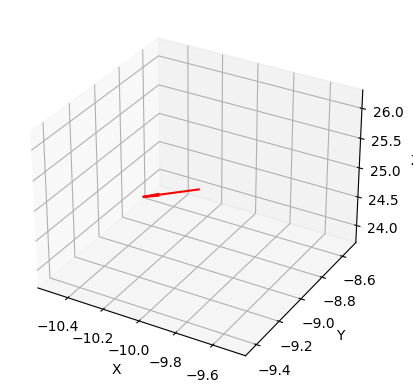

In [ ]:
import os
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from OCC.Core.IGESControl import IGESControl_Reader
from OCC.Core.TopExp import TopExp_Explorer
from OCC.Core.TopoDS import topods_Face
from OCC.Core.BRepAdaptor import BRepAdaptor_Surface
from OCC.Core.BRepLProp import BRepLProp_SLProps
from OCC.Core.TopAbs import TopAbs_FACE
from OCC.Core.gp import gp_Pnt2d

# 先創建 figure 準備後續的可視化
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 檔案路徑
file_path = r"C:\NTHU\IRTI-Project\my_cylinder.igs"

# 確認路徑是否存在
if not os.path.exists(file_path):
    print("檔案路徑錯誤！")
else:
    # 讀取檔案
    reader = IGESControl_Reader()
    reader.ReadFile(file_path)
    reader.TransferRoots()
    shape = reader.Shape()

    # 迴圈跑過所有面
    explorer = TopExp_Explorer(shape, TopAbs_FACE)
    while explorer.More():
        face = topods_Face(explorer.Current())
        adaptor_surface = BRepAdaptor_Surface(face, True)
        if adaptor_surface.GetType() == 7:
            props = BRepLProp_SLProps(adaptor_surface, 2, 0.01)
            u_min, u_max, v_min, v_max = adaptor_surface.FirstUParameter(), adaptor_surface.LastUParameter(), adaptor_surface.FirstVParameter(), adaptor_surface.LastVParameter()
            u_mid = (u_min + u_max) / 2
            v_mid = (v_min + v_max) / 2
            props.SetParameters(u_mid, v_mid)
            if props.IsCurvatureDefined():
                normal = props.Normal()
            
                if face.Orientation() == TopAbs_FACE:
                    normal.Reverse()
                print("法向量:", normal.X(), normal.Y(), normal.Z())

            # 得到面中心點的值
            center = adaptor_surface.Value(u_mid, v_mid)
            # 繪製箭頭
            ax.quiver(center.X(), center.Y(), center.Z(), normal.X(), normal.Y(), normal.Z(), length=0.2, color='r')

        explorer.Next()

# 設置 X Y Z 軸
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

5. 獲取面的資訊(type, area)，有問題，需更改讀檔方式

In [ ]:
import os
import time
from OCC.Display.SimpleGui import init_display
from OCC.Core.IGESControl import IGESControl_Reader
from OCC.Core.TopExp import TopExp_Explorer
from OCC.Core.TopoDS import topods_Face
from OCC.Core.TopAbs import TopAbs_FACE
from OCC.Core.BRepTools import breptools_UVBounds
from OCC.Core.GeomLProp import GeomLProp_SLProps
from OCC.Core.BRepGProp import brepgprop_SurfaceProperties
from OCC.Core.BRepAdaptor import BRepAdaptor_Surface
from OCC.Core.GProp import GProp_GProps
from OCC.Core.gp import gp_Pnt

file_path = r"C:\NTHU\IRTI-Project\my_cylinder.igs"

reader = IGESControl_Reader()
status = reader.ReadFile(file_path)
if status == 1: 
    reader.TransferRoots()
    shape = reader.Shape()

    index = 1
    explorer = TopExp_Explorer(shape, TopAbs_FACE)
    while explorer.More():
        face = topods_Face(explorer.Current())
        
        adaptor_surface = BRepAdaptor_Surface(face, True)
        surface_type = adaptor_surface.GetType()              # 獲取面的類型
    
        # 獲取面的邊界
        u_min, u_max, v_min, v_max = adaptor_surface.FirstUParameter(), adaptor_surface.LastUParameter(), adaptor_surface.FirstVParameter(), adaptor_surface.LastVParameter()
    
        # 計算面積
        gprops = GProp_GProps()                             # 用於獲取面的質量等信息
        brepgprop_SurfaceProperties(face, gprops)           # 計算面的面積
        area = gprops.Mass()                                # 獲取面的面積

        print(f"Face {index}:")
        print(f"  Type: {surface_type}")
        print(f"  Bounds in U: {u_min} to {u_max}")
        print(f"  Bounds in V: {v_min} to {v_max}")
        print(f"  Area: {area}")

        index += 1
        explorer.Next()

Face 1:
  Type: 7
  Bounds in U: -2.6645352591003757e-15 to 6.283185307
  Bounds in V: -7.115251735917265e-14 to 49.999999999999986
  Area: 3141.5926534999953
Face 2:
  Type: 0
  Bounds in U: -10.0 to 10.0
  Bounds in V: -10.0 to 10.0
  Area: 314.1592653589793
Face 3:
  Type: 0
  Bounds in U: -10.0 to 10.0
  Bounds in V: -10.0 to 10.0
  Area: 314.1592653589793


C:\Users\nick2\AppData\Local\Temp\ipykernel_15168\3580376509.py:26: DeprecationWarning: Call to deprecated function topods_Face since pythonocc-core 7.7.1. This function will be removed in a future release, please rather use the static method topods.Face
  face = topods_Face(explorer.Current())
C:\Users\nick2\AppData\Local\Temp\ipykernel_15168\3580376509.py:36: DeprecationWarning: Call to deprecated function brepgprop_SurfaceProperties since pythonocc-core 7.7.1. This function will be removed in a future release, please rather use the static method brepgprop.SurfaceProperties
  brepgprop_SurfaceProperties(face, gprops)           # 計算面的面積
C:\Users\nick2\AppData\Local\Temp\ipykernel_15168\3580376509.py:26: DeprecationWarning: Call to deprecated function topods_Face since pythonocc-core 7.7.1. This function will be removed in a future release, please rather use the static method topods.Face
  face = topods_Face(explorer.Current())
C:\Users\nick2\AppData\Local\Temp\ipykernel_15168\35803765

### 根據一個線段，對其生成許多垂直的平面

In [ ]:
from OCC.Core.gp import gp_Pnt, gp_Dir, gp_Pln, gp_Vec
from OCC.Core.BRepBuilderAPI import BRepBuilderAPI_MakeEdge, BRepBuilderAPI_MakeFace
from OCC.Display.SimpleGui import init_display

# 初始化显示
display, start_display, _, _ = init_display()

start_point = gp_Pnt(0, 0, 0)  # 定义起点
end_point = gp_Pnt(100, 0, 0)  # 定义终点
edge = BRepBuilderAPI_MakeEdge(start_point, end_point).Edge()  # 创建边线

# 显示边线
display.DisplayShape(edge, update=True)

# 边线的方向向量
edge_dir = gp_Vec(start_point, end_point)

# 垂直于边线方向的方向向量，这里我们假设垂直方向是Z轴方向
perpendicular_dir = gp_Dir(1, 0, 0)

# 创建等距垂直平面
num_planes = 5  # 假设我们要创建5个平面
distance = 30  # 平面之间的距离

for i in range(0, num_planes):
    # 计算平面的原点。这里我们沿着边线方向移动，以起点为基础
    plane_origin = start_point.Translated(edge_dir.Multiplied(i * distance / edge_dir.Magnitude()))
    
    # 创建平面。这里平面的方向是垂直于边线的方向
    plane = gp_Pln(plane_origin, perpendicular_dir)
    
    # 以每个平面为基础，创建一个很大的矩形表示平面，并显示它
    face = BRepBuilderAPI_MakeFace(plane, -50, 50, -50, 50).Face()
    display.DisplayShape(face, update=True, color='BLUE', transparency=0.5)

# 开始显示
start_display()

Many colors for color name BLUE, using first.
Many colors for color name BLUE, using first.
Many colors for color name BLUE, using first.
Many colors for color name BLUE, using first.
Many colors for color name BLUE, using first.


根據曲線生成平面

In [ ]:
from OCC.Core.gp import gp_Pnt, gp_Dir, gp_Ax1, gp_Circ, gp_Vec
from OCC.Core.BRepBuilderAPI import BRepBuilderAPI_MakeEdge, BRepBuilderAPI_MakeWire, BRepBuilderAPI_MakeFace
from OCC.Core.GC import GC_MakeArcOfCircle
from OCC.Core.GeomAPI import GeomAPI_ProjectPointOnCurve
from OCC.Core.BRepAdaptor import BRepAdaptor_Curve
from OCC.Core.GCPnts import GCPnts_AbscissaPoint
from OCC.Display.SimpleGui import init_display

# 初始化显示
display, start_display, _, _ = init_display()

# 创建一条圆弧曲线
'''
這裡，我們使用三個點（起點、中間點和終點）創建了一個圓弧。 
透過 GC_MakeArcOfCircle 建立圓弧，
然後使用 BRepBuilderAPI_MakeEdge 將其轉換為邊緣（edge），以便在圖形介面中顯示
'''
start_point = gp_Pnt(0, 0, 0)
end_point = gp_Pnt(100, 0, 0)
intermediate_point = gp_Pnt(50, 50, 0)
arc = GC_MakeArcOfCircle(start_point, intermediate_point, end_point).Value()
edge = BRepBuilderAPI_MakeEdge(arc).Edge()

# 显示曲线
display.DisplayShape(edge, update=True)

'''
BRepAdaptor_Curve：這個適配器用來取得曲線的參數化訊息，包括長度、切線等。

GCPnts_AbscissaPoint：這個類別用來沿著曲線計算等距離點的參數u。 我們先計算整個曲線的長度，然後將其平均分割成指定數量的段，每段代表一個平面的位置。

對於每個等距點：

使用曲線適配器的.Value(u)方法取得曲線上對應於參數u的點。
使用.DN(u, 1)方法取得在u處的切線方向（一階導數），並將其標準化。
建立平面：對於每個切點，我們使用該點和其切線方向（作為平面的法向量）來建立一個平面。 這意味著每個平面都與曲線在該點的切線垂直。

顯示平面：我們為每個平面建立一個大的矩形面，並將其新增至顯示。 這是透過 BRepBuilderAPI_MakeFace 完成的，它接受一個平面和四個邊界值來定義矩形的大小。
'''
# 使用BRepAdaptor_Curve获取曲线上的切线方向
curve_adaptor = BRepAdaptor_Curve(edge)
curve_length = GCPnts_AbscissaPoint.Length(curve_adaptor)
num_planes = 5
distance = curve_length / (num_planes + 1)

for i in range(1, num_planes + 1):
    u = GCPnts_AbscissaPoint(curve_adaptor, i * distance, curve_adaptor.FirstParameter()).Parameter()
    pnt = curve_adaptor.Value(u)
    dir = curve_adaptor.DN(u, 1).Normalized()
    tangent_dir = gp_Dir(dir)
    
    # 切线方向的垂直平面（平面的法向量是切线方向）
    plane_normal = gp_Dir(dir.X(), dir.Y(), dir.Z())
    plane = gp_Pln(pnt, plane_normal)
    
    # 创建并显示平面
    face = BRepBuilderAPI_MakeFace(plane, -40, 40, -40, 40).Face()
    display.DisplayShape(face, update=True, color='BLUE', transparency=0.5)

# 开始显示
start_display()

在長方形平面上生成許多垂直平面，並可視化交線

In [ ]:
from OCC.Core.gp import gp_Pnt, gp_Dir, gp_Pln, gp_Vec
from OCC.Core.BRepBuilderAPI import BRepBuilderAPI_MakeEdge, BRepBuilderAPI_MakeWire, BRepBuilderAPI_MakeFace
from OCC.Core.BRepAdaptor import BRepAdaptor_Curve
from OCC.Core.GCPnts import GCPnts_UniformAbscissa
from OCC.Display.SimpleGui import init_display
from OCC.Core.BRepAlgoAPI import BRepAlgoAPI_Section
from OCC.Core.TopoDS import topods_Wire

# 初始化顯示環境
display, start_display, _, _ = init_display()

# 創建長方形的四個頂點
p1 = gp_Pnt(-20, -10, 0)
p2 = gp_Pnt(20, -10, 0)
p3 = gp_Pnt(20, 10, 0)
p4 = gp_Pnt(-20, 10, 0)

# 創建長方形的四條邊
edge1 = BRepBuilderAPI_MakeEdge(p1, p2).Edge()
edge2 = BRepBuilderAPI_MakeEdge(p2, p3).Edge()
edge3 = BRepBuilderAPI_MakeEdge(p3, p4).Edge()
edge4 = BRepBuilderAPI_MakeEdge(p4, p1).Edge()

# 將邊連接成閉合輪廓（wire）
wire = BRepBuilderAPI_MakeWire()
wire.Add(edge1)
wire.Add(edge2)
wire.Add(edge3)
wire.Add(edge4)

# 創建平面
plane = gp_Pln(gp_Pnt(0, 0, 0), gp_Dir(0, 0, 1))
face = BRepBuilderAPI_MakeFace(plane, wire.Wire()).Face()

# 顯示長方形平面
display.DisplayShape(face, update=True, color='BLUE', transparency=0.5)

# 使用第一條邊來演示如何創建多個垂直於切線的平面
selected_edge = edge1  # 選擇第一條邊
curve_adaptor = BRepAdaptor_Curve(selected_edge)
length = curve_adaptor.LastParameter() - curve_adaptor.FirstParameter()

# 定義生成平面的數量和間距
num_planes = 5
spacing = length / (num_planes + 1)

# 計算並顯示交線
for i in range(1, num_planes + 1):
    u = curve_adaptor.FirstParameter() + i * spacing
    pnt = curve_adaptor.Value(u)
    tangent_vector = curve_adaptor.DN(u, 1).Normalized()
    tangent_dir = gp_Dir(tangent_vector)

    # 創建垂直於切線的平面
    perpendicular_plane = gp_Pln(pnt, tangent_dir)
    perpendicular_face = BRepBuilderAPI_MakeFace(perpendicular_plane, -15, 15, -30, 5).Face()
    display.DisplayShape(perpendicular_face, update=True, color='RED', transparency=0.5)

    # 計算交線
    section = BRepAlgoAPI_Section(face, perpendicular_face, False)
    section.ComputePCurveOn1(True)
    section.Build()
    
    if section.IsDone():
        # 獲取並顯示交線
        intersection_wire = section.Shape()
        display.DisplayShape(intersection_wire, update=True, color='GREEN')

# 開始顯示
start_display()

Many colors for color name BLUE, using first.


在交線上取點，並計算每個點的法向量

In [ ]:
from OCC.Core.gp import gp_Pnt, gp_Dir, gp_Pln, gp_Vec
from OCC.Core.BRepBuilderAPI import BRepBuilderAPI_MakeEdge, BRepBuilderAPI_MakeWire, BRepBuilderAPI_MakeFace
from OCC.Core.BRepAdaptor import BRepAdaptor_Curve
from OCC.Core.GCPnts import GCPnts_UniformAbscissa
from OCC.Display.SimpleGui import init_display
from OCC.Core.BRepAlgoAPI import BRepAlgoAPI_Section
from OCC.Core.TopExp import TopExp_Explorer
from OCC.Core.TopAbs import TopAbs_EDGE
from OCC.Core.TopoDS import topods_Edge
from OCC.Core.GCPnts import GCPnts_AbscissaPoint
from OCC.Core.GCPnts import GCPnts_UniformAbscissa  # 如果使用均匀参数化

# 初始化显示环境
display, start_display, _, _ = init_display()

# 创建长方形的四个顶点
p1 = gp_Pnt(-20, -10, 0)
p2 = gp_Pnt(20, -10, 0)
p3 = gp_Pnt(20, 10, 0)
p4 = gp_Pnt(-20, 10, 0)

# 创建长方形的四条边
edge1 = BRepBuilderAPI_MakeEdge(p1, p2).Edge()
edge2 = BRepBuilderAPI_MakeEdge(p2, p3).Edge()
edge3 = BRepBuilderAPI_MakeEdge(p3, p4).Edge()
edge4 = BRepBuilderAPI_MakeEdge(p4, p1).Edge()

# 将边连接成闭合轮廓（wire）
wire = BRepBuilderAPI_MakeWire()
wire.Add(edge1)
wire.Add(edge2)
wire.Add(edge3)
wire.Add(edge4)

# 创建平面
plane = gp_Pln(gp_Pnt(0, 0, 0), gp_Dir(0, 0, 1))
face = BRepBuilderAPI_MakeFace(plane, wire.Wire()).Face()

# 显示长方形平面
display.DisplayShape(face, update=True, color='BLUE', transparency=0.5)

# 使用第一条边来创建垂直于切线的平面
selected_edge = edge1  # 选择第一条边
curve_adaptor = BRepAdaptor_Curve(selected_edge)
length = curve_adaptor.LastParameter() - curve_adaptor.FirstParameter()

# 定义生成平面的数量和间距
num_planes = 5
spacing = length / (num_planes + 1)

# 计算并显示交线
for i in range(1, num_planes + 1):
    u = curve_adaptor.FirstParameter() + i * spacing
    pnt = curve_adaptor.Value(u)
    tangent_vector = curve_adaptor.DN(u, 1).Normalized()
    tangent_dir = gp_Dir(tangent_vector)

    # 创建垂直于切线的平面
    perpendicular_plane = gp_Pln(pnt, tangent_dir)
    perpendicular_face = BRepBuilderAPI_MakeFace(perpendicular_plane, -15, 15, -30, 5).Face()
    display.DisplayShape(perpendicular_face, update=True, color='RED', transparency=0.5)

    # 计算交线
    section = BRepAlgoAPI_Section(face, perpendicular_face, False)
    section.ComputePCurveOn1(True)
    section.Build()
    
    if section.IsDone():
    # 获取并显示交线
        intersection_shape = section.Shape()
        display.DisplayShape(intersection_shape, update=True, color='GREEN')

        # 遍历找到的形状中的所有边
        explorer = TopExp_Explorer(intersection_shape, TopAbs_EDGE)
        edge = topods_Edge(explorer.Current())
        curve = BRepAdaptor_Curve(edge)

        # 在交线上均匀取10个点
        num_points = 10
        curve_length = GCPnts_AbscissaPoint.Length(curve, curve.FirstParameter(), curve.LastParameter())
        points = GCPnts_UniformAbscissa(curve, curve_length / num_points, curve.FirstParameter())
            
        for j in range(1, num_points + 1):
            param = points.Parameter(j)
            point = curve.Value(param)
            # 显示点和相关信息
            display.DisplayShape(point, update=True, color='YELLOW')
            normal = tangent_vector
            print(f"Point {j}: ({point.X()}, {point.Y()}, {point.Z()})")
            # display.DisplayVector(normal.Multiplied(2), point)  # Show normal vector
            
            

# 开始显示
start_display()

將點投影回2D上尋找法向量

In [ ]:
from OCC.Core.gp import gp_Pnt, gp_Dir, gp_Pln, gp_Vec
from OCC.Core.BRepBuilderAPI import BRepBuilderAPI_MakeEdge, BRepBuilderAPI_MakeWire, BRepBuilderAPI_MakeFace
from OCC.Core.BRepAdaptor import BRepAdaptor_Curve
from OCC.Core.GCPnts import GCPnts_UniformAbscissa
from OCC.Display.SimpleGui import init_display
from OCC.Core.BRepAlgoAPI import BRepAlgoAPI_Section
from OCC.Core.TopExp import TopExp_Explorer
from OCC.Core.TopAbs import TopAbs_EDGE
from OCC.Core.TopoDS import topods_Edge
from OCC.Core.GCPnts import GCPnts_AbscissaPoint
from OCC.Core.GCPnts import GCPnts_UniformAbscissa  # 如果使用均匀参数化
from OCC.Core.BRepLProp import BRepLProp_SLProps
from OCC.Core.BRepAdaptor import BRepAdaptor_Surface
from OCC.Core.GeomAPI import GeomAPI_ProjectPointOnSurf
from OCC.Core.BRep import BRep_Tool
from OCC.Core.TopAbs import TopAbs_FACE


# 初始化显示环境
display, start_display, _, _ = init_display()

# 创建长方形的四个顶点
p1 = gp_Pnt(-20, -10, 0)
p2 = gp_Pnt(20, -10, 0)
p3 = gp_Pnt(20, 10, 0)
p4 = gp_Pnt(-20, 10, 0)

# 创建长方形的四条边
edge1 = BRepBuilderAPI_MakeEdge(p1, p2).Edge()
edge2 = BRepBuilderAPI_MakeEdge(p2, p3).Edge()
edge3 = BRepBuilderAPI_MakeEdge(p3, p4).Edge()
edge4 = BRepBuilderAPI_MakeEdge(p4, p1).Edge()

# 将边连接成闭合轮廓（wire）
wire = BRepBuilderAPI_MakeWire()
wire.Add(edge1)
wire.Add(edge2)
wire.Add(edge3)
wire.Add(edge4)

# 创建平面
plane = gp_Pln(gp_Pnt(0, 0, 0), gp_Dir(0, 0, 1))
face = BRepBuilderAPI_MakeFace(plane, wire.Wire()).Face()

# 显示长方形平面
display.DisplayShape(face, update=True, color='BLUE', transparency=0.5)
adaptor_surface = BRepAdaptor_Surface(face, True)
props = BRepLProp_SLProps(adaptor_surface, 2, 0.01)
# 使用第一条边来创建垂直于切线的平面
selected_edge = edge1  # 选择第一条边
curve_adaptor = BRepAdaptor_Curve(selected_edge)
length = curve_adaptor.LastParameter() - curve_adaptor.FirstParameter()

# 定义生成平面的数量和间距
num_planes = 5
spacing = length / (num_planes + 1)

# 计算并显示交线
for i in range(1, num_planes + 1):
    u = curve_adaptor.FirstParameter() + i * spacing
    pnt = curve_adaptor.Value(u)
    tangent_vector = curve_adaptor.DN(u, 1).Normalized()
    tangent_dir = gp_Dir(tangent_vector)

    # 创建垂直于切线的平面
    perpendicular_plane = gp_Pln(pnt, tangent_dir)
    perpendicular_face = BRepBuilderAPI_MakeFace(perpendicular_plane, -15, 15, -30, 5).Face()
    display.DisplayShape(perpendicular_face, update=True, color='RED', transparency=0.5)
    
    
    # 计算交线
    section = BRepAlgoAPI_Section(face, perpendicular_face, False)
    section.ComputePCurveOn1(True)
    section.Build()
    
    if section.IsDone():
        # 获取并显示交线
        intersection_shape = section.Shape()
        display.DisplayShape(intersection_shape, update=True, color='GREEN')

        # 遍历找到的形状中的所有边
        explorer = TopExp_Explorer(intersection_shape, TopAbs_EDGE)
        edge = topods_Edge(explorer.Current())
        curve = BRepAdaptor_Curve(edge)

        # 在交线上均匀取10个点
        num_points = 10
        curve_length = GCPnts_AbscissaPoint.Length(curve, curve.FirstParameter(), curve.LastParameter())
        points = GCPnts_UniformAbscissa(curve, curve_length / num_points, curve.FirstParameter())
            
        for j in range(1, num_points + 1):
            param = points.Parameter(j)
            point = curve.Value(param)
            # 显示点和相关信息
            display.DisplayShape(point, update=True, color='YELLOW')
            
            surface_handle = BRep_Tool.Surface(face)
            projector = GeomAPI_ProjectPointOnSurf(point, surface_handle)
            # projector.Perform()

            if projector.NbPoints() > 0:
              # 如果成功投影，则获取第一个投影点的UV坐标
                u, v = projector.LowerDistanceParameters()
                
            else:
                print("No projection found for this point")
                
            props.SetParameters(u, v)
            
            if props.IsCurvatureDefined():
                normal = props.Normal()
            
            if face.Orientation() == TopAbs_FACE:
                normal.Reverse()
            
            print(f"Point {j}: ({point.X()}, {point.Y()}, {point.Z()}) - Normal: ({normal.X()}, {normal.Y()}, {normal.Z()})")
            normal_vector = gp_Vec(normal.XYZ())  # 将 gp_Dir 转换为 gp_Vec

            # 在调用 DisplayVector 之前，确保所有的向量都是 gp_Vec 类型
            pnt_as_vec = gp_Vec(point.X(), point.Y(), point.Z())
            start = pnt_as_vec + normal_vector*10
            pnt_start = gp_Pnt(start.X(), start.Y(), start.Z())

            # 使用转换后的向量
            display.DisplayVector(normal_vector, point)
            
            

# 开始显示
start_display()

In [ ]:
from OCC.Core.gp import gp_Ax2, gp_Pnt, gp_Dir, gp_Pln, gp_Vec
from OCC.Core.BRepPrimAPI import BRepPrimAPI_MakeCylinder
from OCC.Core.TopExp import TopExp_Explorer
from OCC.Core.TopAbs import TopAbs_EDGE
from OCC.Core.TopoDS import topods_Edge
from OCC.Core.BRepAdaptor import BRepAdaptor_Curve
from OCC.Core.GCPnts import GCPnts_UniformAbscissa
from OCC.Core.BRepBuilderAPI import BRepBuilderAPI_MakeFace
from OCC.Display.SimpleGui import init_display
from OCC.Core.BRepAlgoAPI import BRepAlgoAPI_Section
from OCC.Core.GCPnts import GCPnts_AbscissaPoint
from OCC.Core.BRep import BRep_Tool
from OCC.Core.GeomAPI import GeomAPI_ProjectPointOnSurf
from OCC.Core.BRepLProp import BRepLProp_SLProps
from OCC.Core.BRepAdaptor import BRepAdaptor_Surface
from OCC.Core.TopAbs import TopAbs_FACE


# 初始化显示环境
display, start_display, _, _ = init_display()

# 创建圆柱
axis = gp_Ax2(gp_Pnt(0, 0, 0), gp_Dir(0, 0, 1))
radius = 10.0
height = 50.0
cylinder = BRepPrimAPI_MakeCylinder(axis, radius, height).Face()

# 显示圆柱
display.DisplayShape(cylinder, update=True, color='BLUE', transparency=0.5)
adaptor_surface = BRepAdaptor_Surface(cylinder, True)
props = BRepLProp_SLProps(adaptor_surface, 2, 0.01)
# 寻找圆柱的直线部分
explorer = TopExp_Explorer(cylinder, TopAbs_EDGE)
selected_edge = None

while explorer.More():
    edge = topods_Edge(explorer.Current())
    curve_adaptor = BRepAdaptor_Curve(edge)
    
    if curve_adaptor.GetType() == 1:  # Check if the edge is a line (Type 1 is Line)
        selected_edge = edge
        display.DisplayShape(edge, update=True, color='GREEN')  # Display the line edge in red
        break
    
    explorer.Next()

# 使用选中的边线来创建垂直于切线的平面
if selected_edge:
    curve_adaptor = BRepAdaptor_Curve(selected_edge)
    length = curve_adaptor.LastParameter() - curve_adaptor.FirstParameter()
    num_planes = 5
    spacing = length / (num_planes + 1)

    for i in range(1, num_planes + 1):
        u = curve_adaptor.FirstParameter() + i * spacing
        pnt = curve_adaptor.Value(u)
        tangent_vector = curve_adaptor.DN(u, 1).Normalized()
        tangent_dir = gp_Dir(tangent_vector)

        # 创建垂直于切线的平面
        perpendicular_plane = gp_Pln(pnt, tangent_dir)
        # -30, 15, -15, 30
        perpendicular_face = BRepBuilderAPI_MakeFace(perpendicular_plane, -5, 5, 55, -55).Face()
        display.DisplayShape(perpendicular_face, update=True, color='RED', transparency=0.5)
        
        # 計算交線
        section = BRepAlgoAPI_Section(cylinder, perpendicular_face, False)
        section.ComputePCurveOn1(True)
        section.Build()
        
        if section.IsDone():
            # 获取并显示交线
            intersection_shape = section.Shape()
            display.DisplayShape(intersection_shape, update=True, color='BLACK')

            # 遍历找到的形状中的所有边
            explorer = TopExp_Explorer(intersection_shape, TopAbs_EDGE)
            edge = topods_Edge(explorer.Current())
            curve = BRepAdaptor_Curve(edge)
            
            # 在交线上均匀取10个点
            num_points = 10
            curve_length = GCPnts_AbscissaPoint.Length(curve, curve.FirstParameter(), curve.LastParameter())
            points = GCPnts_UniformAbscissa(curve, curve_length / num_points, curve.FirstParameter())
            
            for j in range(1, num_points + 1):
                param = points.Parameter(j)
                point = curve.Value(param)
                # 显示点和相关信息
                display.DisplayShape(point, update=True, color='YELLOW')
                surface_handle = BRep_Tool.Surface(cylinder)
                projector = GeomAPI_ProjectPointOnSurf(point, surface_handle)
                
                if projector.NbPoints() > 0:
                    # 如果成功投影，则获取第一个投影点的UV坐标
                    u, v = projector.LowerDistanceParameters()
                    
                else:
                    print("No projection found for this point")
                    
                props.SetParameters(u, v)
                
                if props.IsCurvatureDefined():
                    normal = props.Normal()
                    
                if cylinder.Orientation() == TopAbs_FACE:
                    normal.Reverse()
                print(f"Point {j}: ({point.X()}, {point.Y()}, {point.Z()}) - Normal: ({normal.X()}, {normal.Y()}, {normal.Z()})")
                normal_vector = gp_Vec(normal.XYZ())  # 将 gp_Dir 转换为 gp_Vec
                
                # 在调用 DisplayVector 之前，确保所有的向量都是 gp_Vec 类型
                pnt_as_vec = gp_Vec(point.X(), point.Y(), point.Z())
                start = pnt_as_vec + normal_vector*10
                pnt_start = gp_Pnt(start.X(), start.Y(), start.Z())

                # 使用转换后的向量
                display.DisplayVector(normal_vector, point)
        

# 开始显示界面
start_display()

### 基於固定長度來生成平面跟點

In [13]:
from OCC.Core.gp import gp_Pnt, gp_Dir, gp_Pln, gp_Vec
from OCC.Core.BRepBuilderAPI import BRepBuilderAPI_MakeEdge, BRepBuilderAPI_MakeWire, BRepBuilderAPI_MakeFace
from OCC.Core.BRepAdaptor import BRepAdaptor_Curve
from OCC.Core.GCPnts import GCPnts_UniformAbscissa
from OCC.Display.SimpleGui import init_display
from OCC.Core.BRepAlgoAPI import BRepAlgoAPI_Section
from OCC.Core.TopExp import TopExp_Explorer
from OCC.Core.TopAbs import TopAbs_EDGE
from OCC.Core.TopoDS import topods_Edge
from OCC.Core.GCPnts import GCPnts_AbscissaPoint
from OCC.Core.GCPnts import GCPnts_UniformAbscissa  # 如果使用均匀参数化
from OCC.Core.BRepLProp import BRepLProp_SLProps
from OCC.Core.BRepAdaptor import BRepAdaptor_Surface
from OCC.Core.GeomAPI import GeomAPI_ProjectPointOnSurf
from OCC.Core.BRep import BRep_Tool
from OCC.Core.TopAbs import TopAbs_FACE


# 初始化显示环境
display, start_display, _, _ = init_display()

# 创建长方形的四个顶点
p1 = gp_Pnt(-20, -10, 0)
p2 = gp_Pnt(20, -10, 0)
p3 = gp_Pnt(20, 10, 0)
p4 = gp_Pnt(-20, 10, 0)

# 创建长方形的四条边
edge1 = BRepBuilderAPI_MakeEdge(p1, p2).Edge()
edge2 = BRepBuilderAPI_MakeEdge(p2, p3).Edge()
edge3 = BRepBuilderAPI_MakeEdge(p3, p4).Edge()
edge4 = BRepBuilderAPI_MakeEdge(p4, p1).Edge()

# 将边连接成闭合轮廓（wire）
wire = BRepBuilderAPI_MakeWire()
wire.Add(edge1)
wire.Add(edge2)
wire.Add(edge3)
wire.Add(edge4)

# 创建平面
plane = gp_Pln(gp_Pnt(0, 0, 0), gp_Dir(0, 0, 1))
face = BRepBuilderAPI_MakeFace(plane, wire.Wire()).Face()

# 显示长方形平面
display.DisplayShape(face, update=True, color='BLUE', transparency=0.5)
adaptor_surface = BRepAdaptor_Surface(face, True)
props = BRepLProp_SLProps(adaptor_surface, 2, 0.01)
# 使用第一条边来创建垂直于切线的平面
selected_edge = edge1  # 选择第一条边
curve_adaptor = BRepAdaptor_Curve(selected_edge)
length = curve_adaptor.LastParameter() - curve_adaptor.FirstParameter()
print(length)
# 定义生成平面的数量和间距
plane_spacing = 10.0  # 每隔 50mm 生成一个平面
num_planes = int(length / plane_spacing) + 1  # 计算需要生成的平面数量

if length % plane_spacing != 0:
    iter_plane = num_planes + 1
else:
    iter_plane = num_planes
    
for i in range(0, iter_plane):
    u = curve_adaptor.FirstParameter() + i * plane_spacing
    if u >= curve_adaptor.LastParameter():
        u = curve_adaptor.LastParameter()
    pnt = curve_adaptor.Value(u)
    tangent_vector = curve_adaptor.DN(u, 1).Normalized()
    tangent_dir = gp_Dir(tangent_vector)

    # 创建垂直于切线的平面
    perpendicular_plane = gp_Pln(pnt, tangent_dir)
    perpendicular_face = BRepBuilderAPI_MakeFace(perpendicular_plane, -15, 15, -30, 5).Face()
    display.DisplayShape(perpendicular_face, update=True, color='RED', transparency=0.5)
    
    
    # 计算交线
    section = BRepAlgoAPI_Section(face, perpendicular_face, False)
    section.ComputePCurveOn1(True)
    section.Build()
    
    if section.IsDone():
        # 获取并显示交线
        intersection_shape = section.Shape()
        display.DisplayShape(intersection_shape, update=True, color='GREEN')

        # 遍历找到的形状中的所有边
        explorer = TopExp_Explorer(intersection_shape, TopAbs_EDGE)
        edge = topods_Edge(explorer.Current())
        curve = BRepAdaptor_Curve(edge)

        # 在交线上均匀取10个点
        # num_points = 10
        curve_length = GCPnts_AbscissaPoint.Length(curve, curve.FirstParameter(), curve.LastParameter())
        # points = GCPnts_UniformAbscissa(curve, curve_length / num_points, curve.FirstParameter())
        
        point_spacing = 6
        num_points = int(curve_length / point_spacing) + 1
        if curve_length % point_spacing != 0:
            iter_point = num_points + 1
        else:
            iter_point = num_points

        for j in range(0, iter_point):    
        
            param = curve.FirstParameter() + j * point_spacing
            if param >= curve.LastParameter():
                param = curve.LastParameter()
            point = curve.Value(param)
            # 显示点和相关信息
            display.DisplayShape(point, update=True, color='YELLOW')
            
            surface_handle = BRep_Tool.Surface(face)
            projector = GeomAPI_ProjectPointOnSurf(point, surface_handle)
            # projector.Perform()

            if projector.NbPoints() > 0:
              # 如果成功投影，则获取第一个投影点的UV坐标
                u, v = projector.LowerDistanceParameters()
                
            else:
                print("No projection found for this point")
                
            props.SetParameters(u, v)
            
            if props.IsCurvatureDefined():
                normal = props.Normal()
            
            if face.Orientation() == TopAbs_FACE:
                normal.Reverse()
            
            print(f"Point {j}: ({point.X()}, {point.Y()}, {point.Z()}) - Normal: ({normal.X()}, {normal.Y()}, {normal.Z()})")
            normal_vector = gp_Vec(normal.XYZ())  # 将 gp_Dir 转换为 gp_Vec

            # 在调用 DisplayVector 之前，确保所有的向量都是 gp_Vec 类型
            pnt_as_vec = gp_Vec(point.X(), point.Y(), point.Z())
            start = pnt_as_vec + normal_vector*10
            pnt_start = gp_Pnt(start.X(), start.Y(), start.Z())

            # 使用转换后的向量
            display.DisplayVector(normal_vector, point)
            
            

# 开始显示
start_display()

Many colors for color name BLUE, using first.
40.0
Point 0: (-20.0, 10.0, 0.0) - Normal: (0.0, 0.0, 1.0)
Point 1: (-20.0, 4.0, 0.0) - Normal: (0.0, 0.0, 1.0)
Point 2: (-20.0, -2.0, 0.0) - Normal: (0.0, 0.0, 1.0)
Point 3: (-20.0, -8.0, 0.0) - Normal: (0.0, 0.0, 1.0)
Point 4: (-20.0, -10.0, 0.0) - Normal: (0.0, 0.0, 1.0)
Point 0: (-10.0, -10.0, 0.0) - Normal: (0.0, 0.0, 1.0)
Point 1: (-10.0, -4.0, 0.0) - Normal: (0.0, 0.0, 1.0)
Point 2: (-10.0, 2.0, 0.0) - Normal: (0.0, 0.0, 1.0)
Point 3: (-10.0, 8.0, 0.0) - Normal: (0.0, 0.0, 1.0)
Point 4: (-10.0, 10.0, 0.0) - Normal: (0.0, 0.0, 1.0)


C:\Users\nick2\AppData\Local\Temp\ipykernel_7960\1295431965.py:89: DeprecationWarning: Call to deprecated function topods_Edge since pythonocc-core 7.7.1. This function will be removed in a future release, please rather use the static method topods.Edge
  edge = topods_Edge(explorer.Current())
C:\Users\nick2\AppData\Local\Temp\ipykernel_7960\1295431965.py:89: DeprecationWarning: Call to deprecated function topods_Edge since pythonocc-core 7.7.1. This function will be removed in a future release, please rather use the static method topods.Edge
  edge = topods_Edge(explorer.Current())
C:\Users\nick2\AppData\Local\Temp\ipykernel_7960\1295431965.py:89: DeprecationWarning: Call to deprecated function topods_Edge since pythonocc-core 7.7.1. This function will be removed in a future release, please rather use the static method topods.Edge
  edge = topods_Edge(explorer.Current())


Point 0: (0.0, -10.0, 0.0) - Normal: (0.0, 0.0, 1.0)
Point 1: (0.0, -4.0, 0.0) - Normal: (0.0, 0.0, 1.0)
Point 2: (0.0, 2.0, 0.0) - Normal: (0.0, 0.0, 1.0)
Point 3: (0.0, 8.0, 0.0) - Normal: (0.0, 0.0, 1.0)
Point 4: (0.0, 10.0, 0.0) - Normal: (0.0, 0.0, 1.0)
Point 0: (10.0, -10.0, 0.0) - Normal: (0.0, 0.0, 1.0)
Point 1: (10.0, -4.0, 0.0) - Normal: (0.0, 0.0, 1.0)
Point 2: (10.0, 2.0, 0.0) - Normal: (0.0, 0.0, 1.0)
Point 3: (10.0, 8.0, 0.0) - Normal: (0.0, 0.0, 1.0)
Point 4: (10.0, 10.0, 0.0) - Normal: (0.0, 0.0, 1.0)
Point 0: (20.0, -10.0, 0.0) - Normal: (0.0, 0.0, 1.0)
Point 1: (20.0, -4.0, 0.0) - Normal: (0.0, 0.0, 1.0)
Point 2: (20.0, 2.0, 0.0) - Normal: (0.0, 0.0, 1.0)
Point 3: (20.0, 8.0, 0.0) - Normal: (0.0, 0.0, 1.0)
Point 4: (20.0, 10.0, 0.0) - Normal: (0.0, 0.0, 1.0)


C:\Users\nick2\AppData\Local\Temp\ipykernel_7960\1295431965.py:89: DeprecationWarning: Call to deprecated function topods_Edge since pythonocc-core 7.7.1. This function will be removed in a future release, please rather use the static method topods.Edge
  edge = topods_Edge(explorer.Current())
C:\Users\nick2\AppData\Local\Temp\ipykernel_7960\1295431965.py:89: DeprecationWarning: Call to deprecated function topods_Edge since pythonocc-core 7.7.1. This function will be removed in a future release, please rather use the static method topods.Edge
  edge = topods_Edge(explorer.Current())
